先训练一个简单的卷积神经网络，不做任何正则化，后面将使用数据增强、特征提取、微调等处理来优化模型。

In [1]:
# 数据预处理
# 快速创建python生成器
from keras.preprocessing.image import ImageDataGenerator

train_dir = './data//cats_and_dogs_small/train'
validation_dir = './data//cats_and_dogs_small/validation'

train_datagen = ImageDataGenerator(rescale=1./255)   
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory( 
        train_dir,   
        target_size=(150, 150),   
        batch_size=20, 
        class_mode='binary')   
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=20, 
        class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
# 构建网络
from keras import layers 
from keras import models 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers 
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
#利用批量生成器训练模型
history = model.fit_generator( 
      train_generator, 
      steps_per_epoch=100, 
      epochs=30, 
      validation_data=validation_generator, 
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 132s 1s/step - loss: 0.6851 - acc: 0.5455 - val_loss: 0.6722 - val_acc: 0.5750
Epoch 2/30
100/100 [==============================] - 115s 1s/step - loss: 0.6438 - acc: 0.6260 - val_loss: 0.6216 - val_acc: 0.6600
Epoch 3/30
100/100 [==============================] - 121s 1s/step - loss: 0.5925 - acc: 0.6860 - val_loss: 0.6029 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 116s 1s/step - loss: 0.5528 - acc: 0.7155 - val_loss: 0.5983 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 119s 1s/step - loss: 0.5264 - acc: 0.7275 - val_loss: 0.5765 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 117s 1s/step - loss: 0.5016 - acc: 0.7505 - val_loss: 0.5717 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 115s 1s/step - loss: 0.4748 - acc: 0.7675 - val_loss: 0.5674 - val_acc: 0.7050
Epoch 8/30
100/100 [=

In [4]:
#保存模型
model.save('cats_and_dogs_small_1.h5')

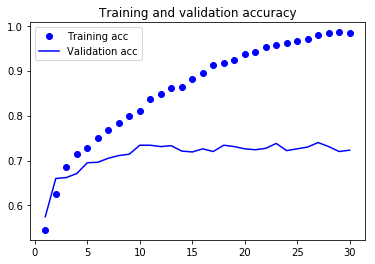

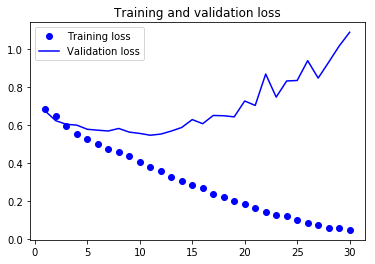

In [5]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt 
%matplotlib inline

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend() 

plt.show()